## **MENTAL HEALTH SENTIMENTAL ANALYSIS USING NLP AND ML**

  PROBLEM : Develop a machine learning model that classifies text data from mental health-related forums or social media platforms into different sentiment categories (e.g., positive, negative, neutral) to identify and track public sentiment surrounding mental health discussions.



### OBJECTIVE :

*   Classify text into different emotions or mental states (e.g., anxiety, depression, happiness, anger, etc.) based on the content.
*   This can help mental health professionals detect signs of distress or emotional changes in individuals based on their written text.



CHALLENGES: When working on a NLP + ML project, particularly one focused on mental health sentiment analysis, there are several challenges that can arise at different stages of the project, ranging from data collection to model deployment.

*   Unstructured Data
*   Imbalanced Data

*   Ambiguity in Text
*   Preprocessing Issues





**1.IMPORTING REQUIRED LIBRARIES**

In [2]:
import numpy as np                                                                # Numerical operations
import pandas as pd                                                               # Data manipulation (DataFrames)
import nltk                                                                       # Natural language processing (NLP)
import matplotlib.pyplot as plt                                                   # Data visualization (plots and charts)
import random                                                                     # Random number generation
from nltk.corpus import stopwords                                                 # Common stopwords removal
import string                                                                     # String manipulation
from nltk.tokenize import word_tokenize,sent_tokenize                             # Tokenizing text into words/sentences
from nltk.stem import PorterStemmer,WordNetLemmatizer                             # Word stemming/Lemmatizing words
from sklearn.preprocessing import LabelEncoder                                    # Encoding categorical labels
from imblearn.over_sampling import RandomOverSampler                              # Handling imbalanced data by oversampling
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV# Splitting data into training/testing sets,Hyperparameter tuning via grid search,Randomized hyperparameter tuning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer       # Text to numerical feature (count-based), Text to numerical feature (TF-IDF)
from sklearn.linear_model import LogisticRegression                               # Logistic regression model for classification
from sklearn.naive_bayes import BernoulliNB                                       # Naive Bayes classifier (binary features)
from sklearn.tree import DecisionTreeClassifier                                   # Decision tree classification
from xgboost import XGBClassifier                                                 # Gradient boosting classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix# Measuring model accuracy,Detailed model performance metrics,Confusion matrix for classification
from sklearn.ensemble import RandomForestClassifier                               # Ensemble of decision trees
from sklearn.tree import DecisionTreeClassifier                                   # Decision tree classification

In [3]:
nltk.download('stopwords')                                                        # Downloads a list of common stopwords for text processing
nltk.download('punkt_tab')
nltk.download('punkt')                                                            # Downloads models for tokenizing text into words and sentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

2.**READING AND UNDERSTANDING OUR DATA**

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Mental Health.csv",index_col=0)

In [5]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [6]:
df.size

106086

In [7]:
df.shape

(53043, 2)

In [8]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


**3.REMOVING MISSING DATA**

In [10]:
df.isna().sum()

,0
statement,362
status,0


In [11]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [12]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
52676,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
52677,"selfishness ""I don't feel very good, it's lik...",Anxiety
52678,Is there any way to sleep better? I can't slee...,Anxiety
52679,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [13]:
df.dtypes

,0
statement,object
status,object


**4.LOOKING AT THE TARGET VARIABLE**

In [14]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


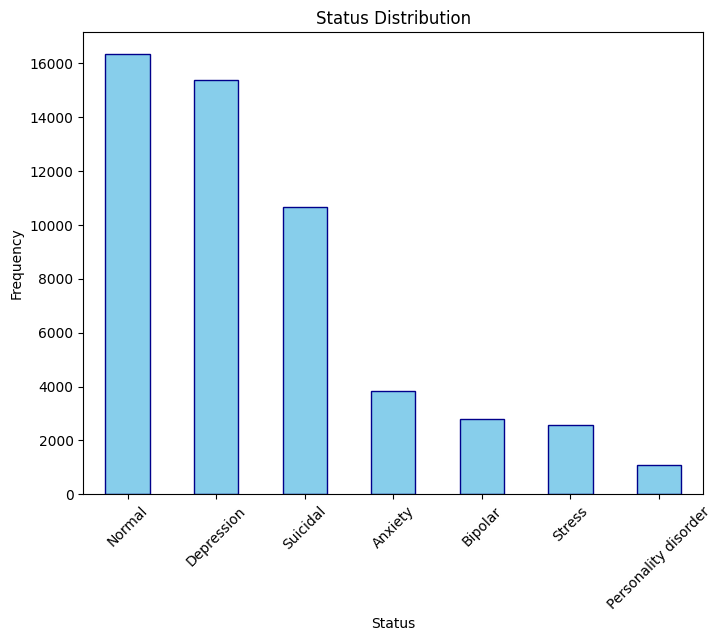

In [15]:
# Plotting the value counts as a bar chart
status_counts = df['status'].value_counts()
# Plotting
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='darkblue')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

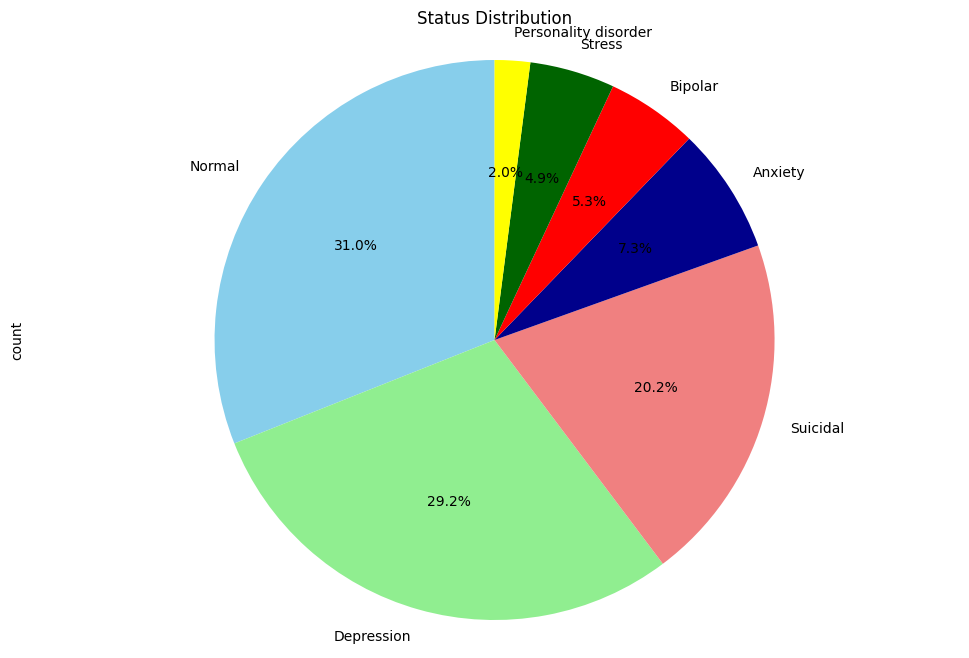

In [16]:
# Plotting the value counts as a pie chart
# Create the pie chart
plt.figure(figsize=(12, 8))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral','darkblue','red','darkgreen','yellow'], startangle=90)
# Title
plt.title('Status Distribution')
# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')
# Show the plot
plt.show()

**NOTE**:The target variable in our dataset is unbalanced. This imbalance could affect our model's performance, so we'll need to address it later to ensure accurate and fair predictions.

In [66]:
#looking at the raw texts
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}")
    print(f"Statement: {statement}\n")

Status: Anxiety
Statement: Scared I’ve got cervical cancer; Hiya. 

I’ve been trying to keep my HA at bay, been plagued by it for 15yrs almost now. Currently worrying I have cervical cancer and I can’t check because I have vaginismus whenever I try to have smear tests. I’ve had a lot going on since October last year and tried to seek answers from health professionals (I say that so lightly) and people on Reddit for advice. I’ve had loads of symptoms since January that you can get with various stages of cervical cancer but I don’t know if it’s based on basic stuff. I’ve had around 5+ blood tests, stool samples, ultrasounds of my ovaries in that time and two unsuccessful smear exams. I’m super scared but apparently any changes could be picked up in bloodwork I’ve been told by a semi professional, my bf’s mum is a GP so I try to ask him to get her opinions etc. I’m so scared and keep googling cervical cancer and the signs. Tho I’ve had swabs taken from just outside my cervix tho that won’

**5.ADDING NEW FEATURE TO THE DATA**

In [18]:
df['num_of_characters'] = df['statement'].str.len()


In [19]:
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Generate descriptive statistics
description = df[['num_of_characters', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

       num_of_characters  num_of_sentences
count       52681.000000      52681.000000
mean          578.713863          6.280215
std           846.269078         10.688388
min             2.000000          1.000000
25%            80.000000          1.000000
50%           317.000000          3.000000
75%           752.000000          8.000000
max         32759.000000       1260.000000


In [20]:
df

,statement,status,num_of_characters,num_of_sentences
0,oh my gosh,Anxiety,10,1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2
3,I've shifted my focus to something else but I'...,Anxiety,61,1
4,"I'm restless and restless, it's been a month n...",Anxiety,72,2
...,...,...,...,...
52676,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,1766,16
52677,"selfishness ""I don't feel very good, it's lik...",Anxiety,1012,12
52678,Is there any way to sleep better? I can't slee...,Anxiety,85,2
52679,"Public speaking tips? Hi, all. I have to give ...",Anxiety,401,6


In [55]:
df[df['num_of_characters']<300]

,statement,status,num_of_characters,num_of_sentences
0,oh my gosh,Anxiety,10,1
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2
3,I've shifted my focus to something else but I'...,Anxiety,61,1
4,"I'm restless and restless, it's been a month n...",Anxiety,72,2
...,...,...,...,...
52662,Are SSRI side effects dose dependent? For exam...,Anxiety,152,2
52664,Waking up with a feeling of discomfort in the ...,Anxiety,259,3
52665,again low the fear of going crazy.. it's here ...,Anxiety,93,1
52670,Anyone have any good experiences with Cymbalta...,Anxiety,210,4


In [21]:
df[df['num_of_characters'] > 10000]

,statement,status,num_of_characters,num_of_sentences
7841,So introduction I guess.. my name is Michael a...,Depression,10679,136
9406,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,Suicidal,25302,1
9494,"Hello everyone,I rarely post on Reddit but.......",Depression,11163,139
10824,I have only 1 person I can somewhat open to bu...,Suicidal,27390,237
11527,"The title is not meant to discourage others, b...",Depression,12304,155
11571,I no longer know what else to do but write thi...,Depression,13530,140
11626,And has life gotten better?&amp;#x200B;No. Eve...,Depression,12819,96
11821,Sorry this is long but I doubt anyone will eve...,Depression,11122,155
13283,I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...,Suicidal,32759,1260
18205,I am someone living in Turkey. My age is proba...,Suicidal,10219,180


NOTE:We have several lengthy messages, most of which express suicidal thoughts or signs of depression

**6.TEXT PREPROCESSING**

In [22]:
stop_words=stopwords.words('english')

In [23]:
punct=string.punctuation

In [24]:
stemmer=PorterStemmer()
le=WordNetLemmatizer()

In [25]:
def preprocess(sent):
  #for removing punctuations,lower
  lst="".join([i for i in sent if i not in punct]).lower()
  #for tokenization
  tokens=word_tokenize(lst)
  #for stemming and removal of stopwords
  stop_word_removal= [stemmer.stem(i) for i in tokens if i not in stop_words]
  return " ".join(stop_word_removal)

**7.LABEL ENCODING**

In [26]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


In [29]:
#since y is categorical, we need to do labelencoding
le=LabelEncoder()
y=le.fit_transform(y)

**8.DATA PREPROCESSING**

In [28]:
x=df['statement']
y=df['status']

In [30]:
#since its an imbalanced datset,we need to do the sampling
sampler=RandomOverSampler()
x_over,y_over=sampler.fit_resample(df[['statement']],y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [31]:
x_over_pre=x_over['statement'].apply(func=preprocess)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_over_pre,y_over,test_size=0.3,random_state=42)

In [33]:
#feature extraction--->text data to numerical data
vect=TfidfVectorizer()
#vect=CountVectorizer()
x_train_vec=vect.fit_transform(x_train)
x_test_vec=vect.transform(x_test)

**9.MODEL TRAINING AND EVALUATION**

In [34]:
models=[LogisticRegression(),BernoulliNB(),DecisionTreeClassifier(),XGBClassifier()]

In [35]:
for i in models:
  print(i)
  i.fit(x_train_vec,y_train)
  y_pred=i.predict(x_test_vec)
  print("classification: ",classification_report(y_test,y_pred))
  print("Accuracy Score: ", accuracy_score(y_test,y_pred))
  print("Confusion_matrix",confusion_matrix(y_test,y_pred))
  print('***********************************************')

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification:                precision    recall  f1-score   support

           0       0.91      0.91      0.91      5035
           1       0.94      0.93      0.93      4908
           2       0.71      0.60      0.65      4874
           3       0.87      0.90      0.88      4949
           4       0.93      0.99      0.96      4843
           5       0.87      0.91      0.89      4839
           6       0.72      0.74      0.73      4873

    accuracy                           0.85     34321
   macro avg       0.85      0.85      0.85     34321
weighted avg       0.85      0.85      0.85     34321

Accuracy Score:  0.8528889018385245
Confusion_matrix [[4583   52   94   82   70  135   19]
 [  45 4548   96   35   41   73   70]
 [ 159  148 2903  212  138  185 1129]
 [  39   26   85 4462   37  191  109]
 [  17    0    0    9 4802    8    7]
 [ 173   21  110   46   47 4391   51]
 [  25   28  825  292   36   84 3583]]
***********************************************
BernoulliNB()
clas

NOTE:I'm choosing DecisionTreeclassifier(), its has an accuracy of 88%.`italicised text`

**10.HYPERPARAMETER TUNING**

In [36]:
# Define the parameter grid for DecisionTreeClassifier
parameters = {
    'max_depth': [10, 20, 30, 40, 50],                                            # List of possible max depths
    'min_samples_split': [2, 10, 20, 30, 40],                                     # List of possible min samples to split
    'criterion': ['gini', 'entropy']                                              # List of possible criteria
}

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Perform RandomizedSearchCV
rs_cv = RandomizedSearchCV(dt_classifier, parameters, cv=5, n_iter=7, random_state=42)
rs_cv.fit(x_train_vec, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=7,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_split': [2, 10, 20, 30,
                                                              40]},
                   random_state=42)

In [37]:
#Print best parameters and best score
print("Best Parameters:", rs_cv.best_params_)

Best Parameters: {'min_samples_split': 2, 'max_depth': 50, 'criterion': 'entropy'}


In [38]:
print("Best Score:", rs_cv.best_score_)

Best Score: 0.8540834165834166


In [39]:
result=rs_cv.best_estimator_

In [40]:
best_y_pred=result.predict(x_test_vec)

In [41]:
print("classification report",classification_report(y_test,best_y_pred))

calssification report               precision    recall  f1-score   support

           0       0.94      0.97      0.95      5035
           1       0.95      0.98      0.96      4908
           2       0.73      0.57      0.64      4874
           3       0.79      0.88      0.83      4949
           4       0.98      1.00      0.99      4843
           5       0.92      0.98      0.95      4839
           6       0.73      0.70      0.72      4873

    accuracy                           0.87     34321
   macro avg       0.86      0.87      0.86     34321
weighted avg       0.86      0.87      0.86     34321



In [42]:
#check how model prediction will be on a single unseen text data
best_model=DecisionTreeClassifier()
best_model.fit(x_train_vec,y_train)

DecisionTreeClassifier()

In [43]:
#x.sample(1)
x.loc[52679]

'Public speaking tips? Hi, all. I have to give a presentation at work next week (45 minutes long and the CEO will be in attendance). I’m already panicking, as once the anxiety kicks in, I’m certain I’m going to forget everything I’m supposed to say. ( anxiety makes it very difficult for me to focus on anything) Does anyone have any speaking tips that have worked for them in the past? Thanks so much!'

In [62]:
new_text="panicking and anxiety kicks...."
preprocessed=preprocess(new_text)
preprocessed

'panick anxieti kick'

In [63]:
vector=vect.transform([preprocessed])

In [64]:
best_model.predict(vector)

array([0])

In [65]:
le.inverse_transform([0])

array(['Anxiety'], dtype=object)

In [48]:
df.loc[52679]

,52679
statement,"Public speaking tips? Hi, all. I have to give ..."
status,Anxiety
num_of_characters,401
num_of_sentences,6


**So with this we can conculde that our model predicts correctly with unseen data aswell.**